In [11]:
merged_chip_folder = "/data/home/natant/Negatives/Data/Encode690/ENCODE_hg38_subset_celltype_merged_no_CTCF/ENOCDE_hg38_subset_celltype_merged_no_CTCF_threshold_0bp"

In [12]:
import os
import pandas as pd

# List all files in the merged_chip_folder

chip_files = [f for f in os.listdir(merged_chip_folder) if os.path.isfile(os.path.join(merged_chip_folder, f))]
chip_files = [f for f in chip_files if f.endswith('_merged.narrowPeak')]

single_tf_count = 0
total_peaks = 0

# # Iterate through each file and process the data
# for file in chip_files:
#     file_path = os.path.join(merged_chip_folder, file)
#     df = pd.read_csv(file_path, sep='\t', header=None)
    
#     # Column 4 contains the TFs
#     df['TF_count'] = df[3].apply(lambda x: len(x.split(',')))
    
#     single_tf_count += df[df['TF_count'] == 1].shape[0]
#     total_peaks += df.shape[0]

# # Calculate the percentage and absolute value
# percentage_single_tf = (single_tf_count / total_peaks) * 100

# print(f"Total peaks: {total_peaks}")
# print(f"Peaks represented by a single TF: {single_tf_count} ({percentage_single_tf:.2f}%)")
# Initialize a list to store the results for each cell type
results = []

# Iterate through each file and process the data
for file in chip_files:
    file_path = os.path.join(merged_chip_folder, file)
    df = pd.read_csv(file_path, sep='\t', header=None)
    
    # Column 4 contains the TFs
    df['TF_count'] = df[3].apply(lambda x: len(x.split(',')))
    df["delta"]=df[2]-df[1]
    
    single_tf_count = df[df['TF_count'] == 1].shape[0]
    total_peaks = df.shape[0]
    percentage_single_tf = (single_tf_count / total_peaks) * 100
    unique_tfs = len(set([tf for sublist in df[3].str.split(',') for tf in sublist]))
    longer_peaks = (sum(df["delta"]!=101)/total_peaks)*100

    results.append({
        'CellType': file,
        'TotalPeaks': total_peaks,
        'SingleTFPeaks': single_tf_count,
        'PercentageSingleTF': percentage_single_tf,
        'UniqueTFs': unique_tfs,
        'LongerPeaks': longer_peaks,
        'meanPeakLength': df["delta"].mean()
    })

# Create a dataframe from the results
results_df = pd.DataFrame(results)


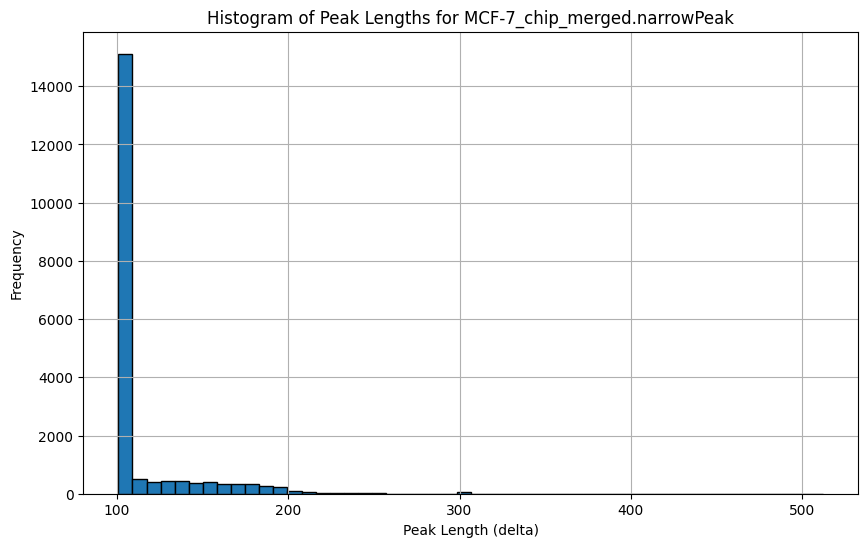

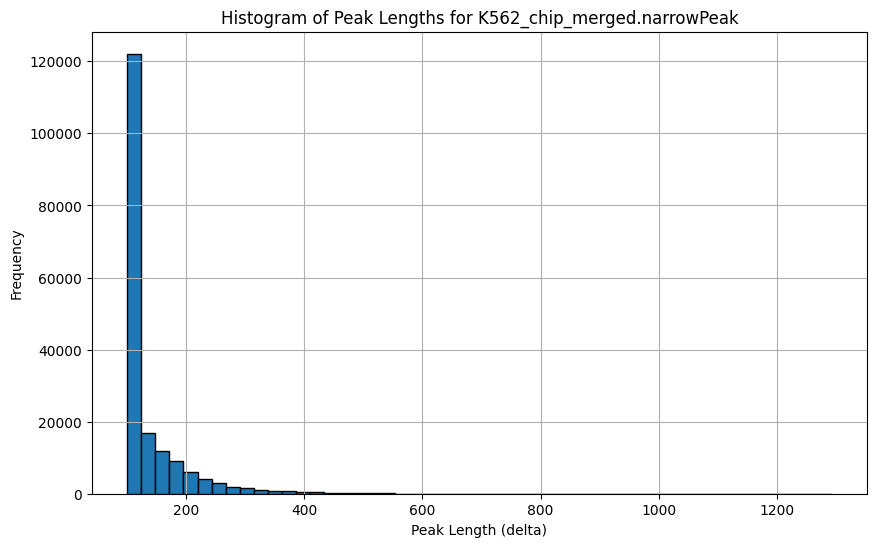

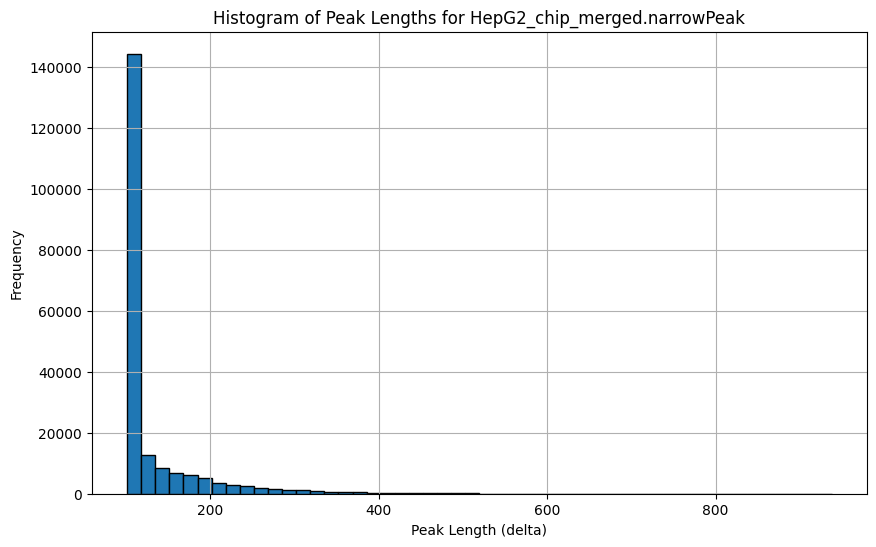

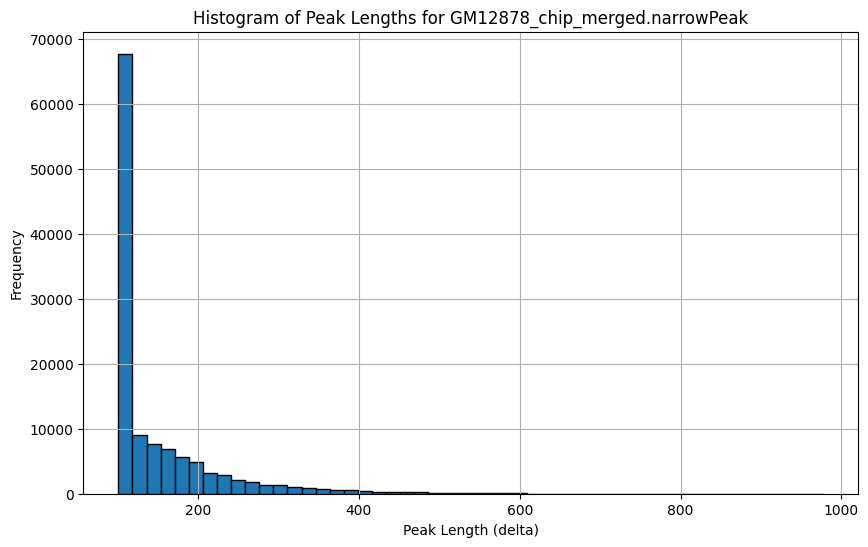

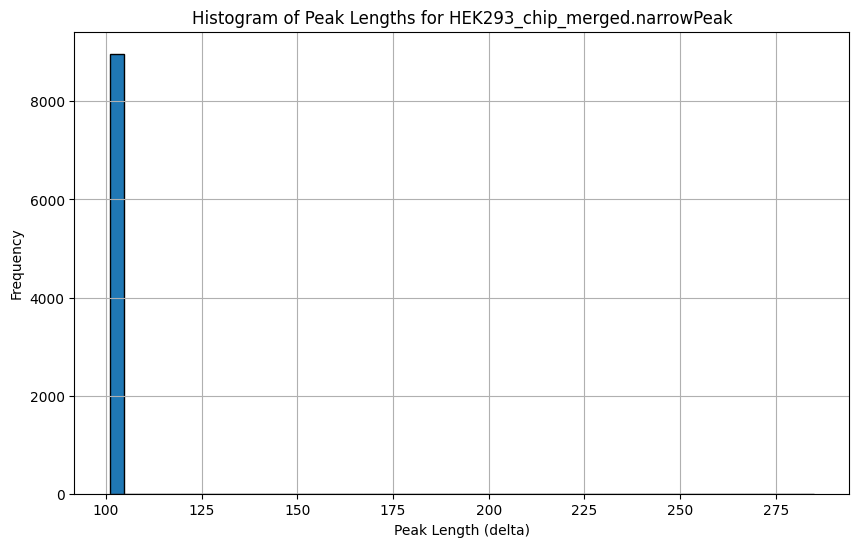

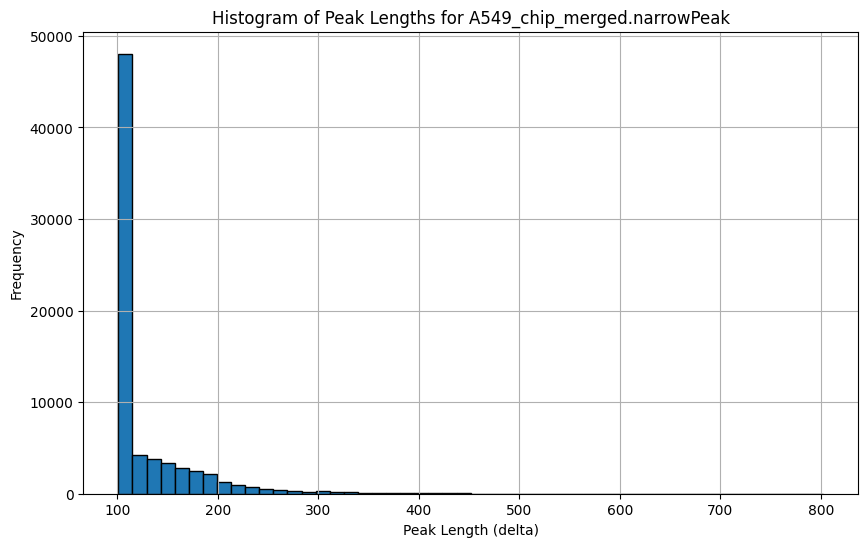

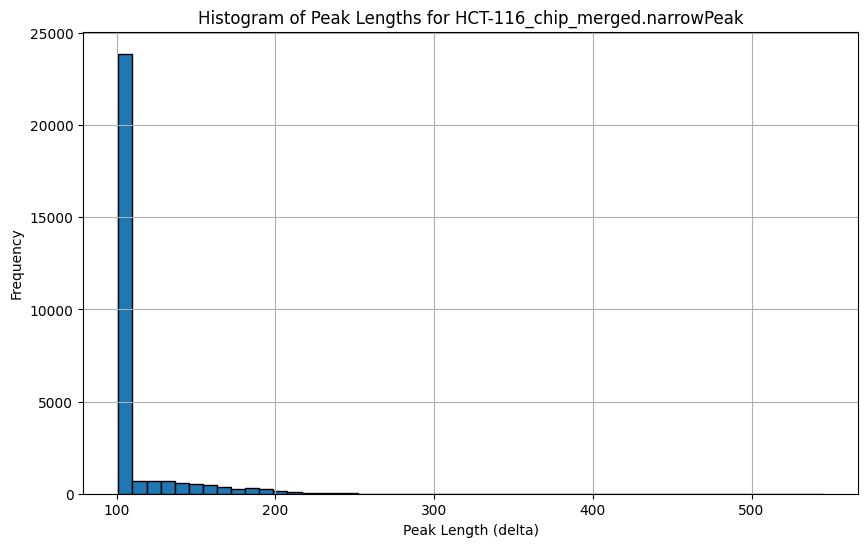

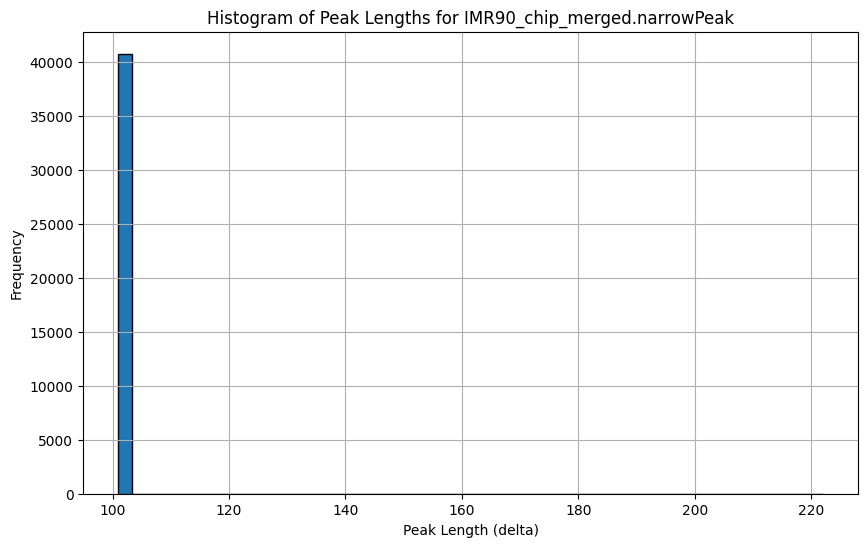

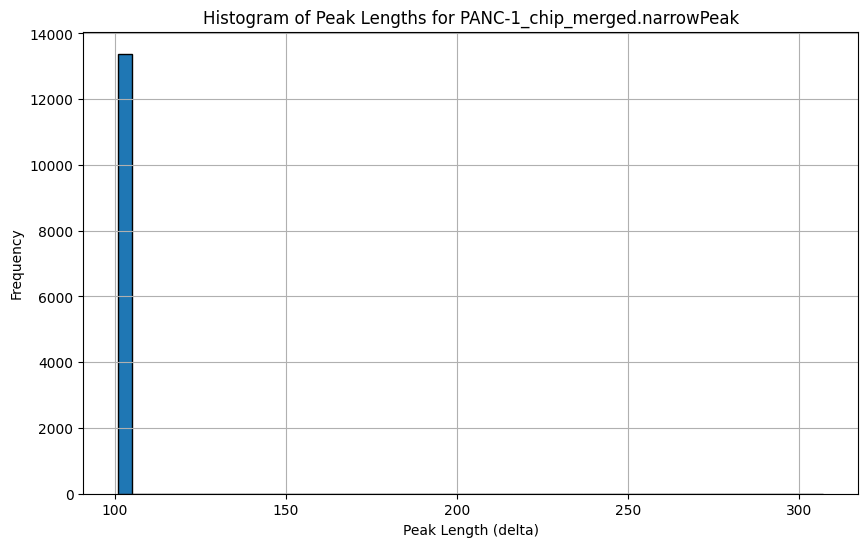

In [13]:
import matplotlib.pyplot as plt

# Iterate through each file and create a histogram of the peak lengths
for file in chip_files:
    file_path = os.path.join(merged_chip_folder, file)
    df = pd.read_csv(file_path, sep='\t', header=None)
    
    # Calculate the peak lengths
    df['delta'] = df[2] - df[1]
    
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['delta'], bins=50, edgecolor='black')
    plt.title(f'Histogram of Peak Lengths for {file}')
    plt.xlabel('Peak Length (delta)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [8]:
results_df # TODO: CHECK IF THESE VALUES ARE CORRECT!

""


In [14]:
df["delta"].mean()

101.06562150055991

In [15]:
df["delta"]=df[2]-df[1]
sum(df["delta"]!=101)

11

In [17]:
import os
import re

base_folder = "/data/home/natant/Negatives/Data/Encode690/ENCODE_hg38_subset_celltype_merged_no_CTCF"

# List all directories in the base folder
all_folders = [f for f in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, f))]

# Filter folders that match the pattern "_overlap_threshold_[VAR]bp"
pattern = re.compile(r"_threshold_\d+bp$")
filtered_folders = [folder for folder in all_folders if pattern.search(folder)]

print(filtered_folders)

['ENOCDE_hg38_subset_celltype_merged_no_CTCF_threshold_100bp', 'ENOCDE_hg38_subset_celltype_merged_no_CTCF_threshold_102bp', 'ENOCDE_hg38_subset_celltype_merged_no_CTCF_threshold_50bp', 'ENOCDE_hg38_subset_celltype_merged_no_CTCF_threshold_30bp', 'ENOCDE_hg38_subset_celltype_merged_no_CTCF_threshold_101bp', 'ENOCDE_hg38_subset_celltype_merged_no_CTCF_threshold_40bp', 'ENOCDE_hg38_subset_celltype_merged_no_CTCF_threshold_10bp', 'ENOCDE_hg38_subset_celltype_merged_no_CTCF_threshold_20bp', 'ENOCDE_hg38_subset_celltype_merged_no_CTCF_threshold_0bp']


In [18]:
# Initialize a list to store the results for each folder
all_results = []

# Iterate through each filtered folder
for folder in filtered_folders:
    folder_path = os.path.join(base_folder, folder)
    
    # List all files in the current folder
    chip_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    chip_files = [f for f in chip_files if f.endswith('_merged.narrowPeak')]
    
    # Initialize a list to store the results for each cell type in the current folder
    folder_results = []
    
    # Iterate through each file and process the data
    for file in chip_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, sep='\t', header=None)
        
        # Column 4 contains the TFs
        df['TF_count'] = df[3].apply(lambda x: len(x.split(',')))
        df["delta"] = df[2] - df[1]
        
        single_tf_count = df[df['TF_count'] == 1].shape[0]
        total_peaks = df.shape[0]
        percentage_single_tf = (single_tf_count / total_peaks) * 100
        unique_tfs = len(set([tf for sublist in df[3].str.split(',') for tf in sublist]))
        longer_peaks = (sum(df["delta"] != 101) / total_peaks) * 100

        folder_results.append({
            'Folder': folder,
            'CellType': file,
            'TotalPeaks': total_peaks,
            'SingleTFPeaks': single_tf_count,
            'PercentageSingleTF': percentage_single_tf,
            'UniqueTFs': unique_tfs,
            'LongerPeaks': longer_peaks,
            'meanPeakLength': df["delta"].mean()
        })
    
    # Append the results of the current folder to the all_results list
    all_results.extend(folder_results)

# Create a dataframe from the all_results
all_results_df = pd.DataFrame(all_results)
# Rename the "Folder" column to "threshold"
all_results_df.rename(columns={'Folder': 'threshold'}, inplace=True)

# Modify the values of the "threshold" column
all_results_df['threshold'] = all_results_df['threshold'].apply(lambda x: x.split("_")[-1])

# Modify the values of the "CellType" column
all_results_df['CellType'] = all_results_df['CellType'].apply(lambda x: x.split("_")[0])

# Modify the values of the "CellType" column
results_df['CellType'] = results_df['CellType'].apply(lambda x: x.split("_")[0])

# Add a "threshold" column with a value of "10bp"
results_df['threshold'] = '1bp'

all_results_df = pd.concat([all_results_df, results_df], ignore_index=True)
all_results_df['threshold'] = all_results_df['threshold'].str.replace('bp', '').astype(int)
all_results_df


,threshold,CellType,TotalPeaks,SingleTFPeaks,PercentageSingleTF,UniqueTFs,LongerPeaks,meanPeakLength
0,100,MCF-7,26018,25658,98.616343,3,0.784073,101.007956
1,100,K562,466751,436011,93.414047,35,4.376209,101.048257
2,100,HepG2,467851,439073,93.848896,33,4.140848,101.045307
3,100,GM12878,370683,345312,93.155607,35,4.554565,101.050911
4,100,HEK293,8992,8989,99.966637,1,0.000000,101.000000
...,...,...,...,...,...,...,...,...
85,1,HEK293,8979,8969,99.888629,1,0.100234,101.073059
86,1,A549,72472,43329,59.787228,13,39.996136,126.944696
87,1,HCT-116,29143,23205,79.624610,3,20.207254,110.031431
88,1,IMR90,40808,40790,99.955891,1,0.044109,101.021442


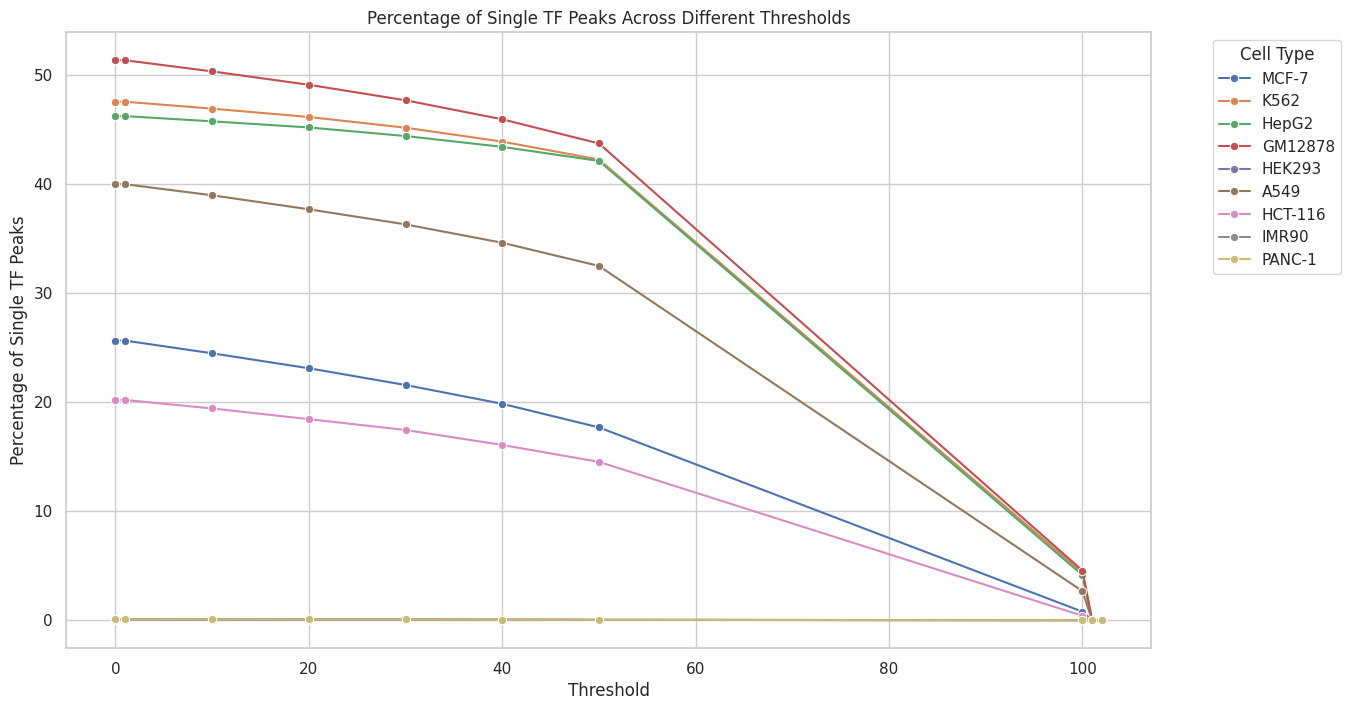

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.lineplot(x='threshold', y='LongerPeaks', hue='CellType', data=all_results_df, marker='o')
plt.title('Percentage of Single TF Peaks Across Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Percentage of Single TF Peaks')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

